In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("C:/Users/admin/GRIP Internship Tasks/Task2_Clustering/Iris_dataset.csv")
df = df.drop(columns={"Id", "Species"}, axis=1).dropna()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Standardizing cluster variables to have Mean = 0 and Standard Deviation = 1

In [5]:
clustervar = df.copy()
clustervar['SepalLengthCm'] = preprocessing.scale(clustervar['SepalLengthCm'].astype('float64'))
clustervar['SepalWidthCm'] = preprocessing.scale(clustervar['SepalWidthCm'].astype('float64'))
clustervar['PetalLengthCm'] = preprocessing.scale(clustervar['PetalLengthCm'].astype('float64'))
clustervar['PetalWidthCm'] = preprocessing.scale(clustervar['PetalWidthCm'].astype('float64'))


## Splitting data into train and test sets

In [7]:
# 0.3 means storing 30% of data in test dataset, random_state insures that data are randomly split the same way if we run the code again 
clus_train, clus_test = train_test_split(clustervar, test_size=0.3, random_state=123) 


## KMeans cluster analysis

In [10]:
from scipy.spatial.distance import cdist # used to calculate avaerage distance from clusters to cenroids
clusters = range(1, 10)     # will use this object when we specify the number of clusters we want to test
meandist = []         # used to store the average distance value that we will calculate for 1-9 cluster solutions

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(clus_train)
    clusassign = model.predict(clus_train)   # clusassign stores each observation the cluster number to which it was assigned based on the cluster analysis
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) / clus_train.shape[0])
    

## Plotting the elbow curve

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

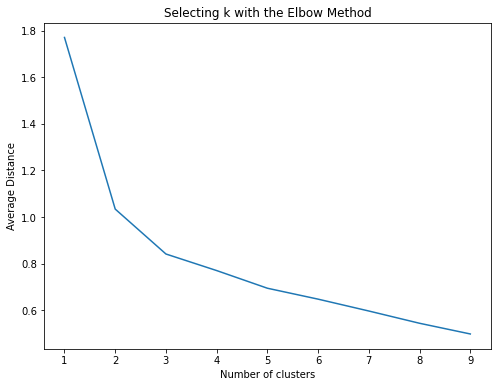

In [52]:
plt.figure(figsize=(8,6))
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance')
plt.title('Selecting k with the Elbow Method')

# Average distnace decreases as the number of clsuetrs increases
# The goal of cluster analysis is to minimize the distance between observations and their assigned clusters

#### - In the above graph, there are 3 bends, but the 3rd bend is not very clear, which suggests that there might be 2 clusters. We also do not want overlapping clusters.

## Interpreting 3 cluster solution

In [13]:
model = KMeans(n_clusters = 3)
model.fit(clus_train)
clusassign = model.predict(clus_train)

## Plotting the Clusters

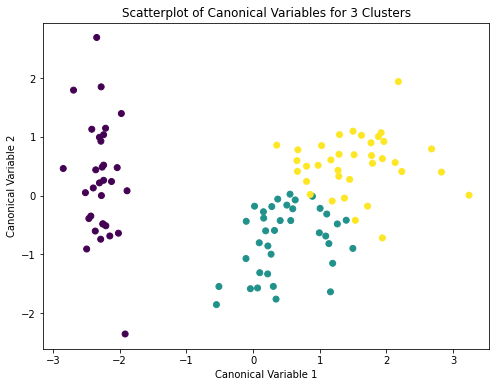

In [33]:
from sklearn.decomposition import PCA  #  to conduct Canonical Discriminate Analysis

pca_2 = PCA(2) # returns first 2 canonical variables
plot_columns = pca_2.fit_transform(clus_train)

plt.figure(figsize=(8,6))
plt.scatter(x = plot_columns[:, 0], y = plot_columns[:, 1], c = model.labels_)
plt.xlabel("Canonical Variable 1")
plt.ylabel("Canonical Variable 2")
plt.title("Scatterplot of Canonical Variables for 3 Clusters")
plt.show()

#print(plot_columns)

#### - We can see that the 2nd and 3rd clusters are overlapping, which suggets that 2 clusters solution might be better.

## Creating a unique identifier 

In [34]:
# Creating a unique identifier variable from the index for clus_train to merge with cluster assignment variables

clus_train.reset_index(level = 0, inplace = True)

In [35]:
# Creating a list that has new index variable

cluslist = list(clus_train['index'])

In [36]:
# Creating a list of Cluster assignments

labels = list(model.labels_)

In [51]:
# Combine index variable list with cluster assignment list into a dictionary
newlist = dict(zip(cluslist, labels))
newlist

{114: 1,
 136: 2,
 53: 1,
 19: 0,
 38: 0,
 110: 2,
 23: 0,
 9: 0,
 86: 2,
 91: 1,
 89: 1,
 79: 1,
 101: 1,
 65: 2,
 115: 2,
 41: 0,
 124: 2,
 95: 1,
 21: 0,
 11: 0,
 103: 2,
 74: 1,
 122: 2,
 118: 2,
 44: 0,
 51: 2,
 81: 1,
 149: 1,
 12: 0,
 129: 2,
 56: 2,
 50: 2,
 25: 0,
 128: 2,
 146: 1,
 43: 0,
 1: 0,
 71: 1,
 54: 1,
 100: 2,
 14: 0,
 6: 0,
 80: 1,
 26: 0,
 70: 2,
 139: 2,
 30: 0,
 108: 2,
 15: 0,
 18: 0,
 77: 2,
 22: 0,
 10: 0,
 58: 2,
 107: 2,
 75: 2,
 64: 1,
 69: 1,
 3: 0,
 40: 0,
 76: 2,
 134: 1,
 34: 0,
 27: 0,
 94: 1,
 85: 2,
 97: 1,
 102: 2,
 52: 2,
 92: 1,
 99: 1,
 105: 2,
 7: 0,
 48: 0,
 61: 1,
 120: 2,
 137: 2,
 125: 2,
 147: 2,
 39: 0,
 84: 1,
 2: 0,
 67: 1,
 55: 1,
 49: 0,
 68: 1,
 140: 2,
 78: 1,
 144: 2,
 111: 2,
 32: 0,
 73: 1,
 47: 0,
 148: 2,
 113: 1,
 96: 1,
 57: 1,
 123: 1,
 106: 1,
 83: 1,
 17: 0,
 98: 1,
 66: 1,
 126: 1,
 109: 2}

In [38]:
# Convert newlist distionary to dataframe

newclus = pd.DataFrame.from_dict(newlist, orient='index')
newclus.head()

,0
114,1
136,2
53,1
19,0
38,0


In [39]:
# Doing the same for cluster assignment variables

# renaming the cluster assignment column

newclus.columns = ['clusters']

In [40]:
# Creating a unique identifier variable from the index for the Cluster assignment dataframe to merge with cluster training data

newclus.reset_index(level = 0, inplace = True)

In [44]:
# Merging the cluster assignment dataframe with the cluster training variable dataframe by the index variable

merged_train = pd.merge(clus_train, newclus, on = 'index')
merged_train.head()

,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,114,-0.052506,-0.587764,0.762759,1.579429,1
1,136,0.553333,0.800654,1.047087,1.579429,2
2,53,-0.416010,-1.744778,0.137236,0.133226,1
3,19,-0.900681,1.726266,-1.284407,-1.181504,0
4,38,-1.748856,-0.124958,-1.398138,-1.312977,0


In [46]:
# Cluster frequencies

merged_train.clusters.value_counts()

1    37
2    36
0    32
Name: clusters, dtype: int64

In [48]:
# Calculating clustering variable means by cluster

clustergrp = merged_train.groupby('clusters').mean()
print("Clustering variables means by cluster")
print(clustergrp)

Clustering variables means by cluster
               index  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
clusters                                                                      
0          24.156250      -1.021849      0.836811      -1.300400     -1.243132
1          88.648649      -0.059056     -0.806658       0.337034      0.293126
2         103.555556       1.061565      0.061450       0.939674      0.929368


#### - Above summary shows that most variables in SepalLengthCm belongs to Cluster 2, SepalWidthCm in Cluster 0, PetalLengthCm in Cluster 2, and PetalWidthCm in Cluster 2.